In [2]:
import sys
sys.path.append('../')

In [31]:
from benji_girgs import generation, utils
import networkit as nk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
n = 2500
d = 1
targetDeg = 15.0
tau=2.1
alpha=1.9

g = generation.cgirg_gen(n, d, tau, alpha, targetDeg)[0]
g = utils.get_largest_component(g)
print(g.numberOfNodes())

2472


In [50]:
def f(m, **kwargs):
    outs = []
    for i in range(m):
        g = generation.cgirg_gen(**kwargs)[0]
        g = utils.get_largest_component(g)
        print(g.numberOfNodes())
        ed = nk.distance.EffectiveDiameter(g)
        _ = ed.run()
        edout = ed.getEffectiveDiameter()
        print(f'edout: {edout}')
        outs.append(edout)
        
    return outs
     
outs = []
for d in [1,2,3,4]:
    outs.append(f(15, n=n, d=d, tau=tau, alpha=alpha, desiredAvgDegree=targetDeg))
    

2485
edout: 3.062374245472837
2475
edout: 3.067070707070707
2475
edout: 3.0816161616161617
2488
edout: 3.0687299035369775
2482
edout: 3.0684931506849313
2480
edout: 3.1903225806451614
2481
edout: 3.006852075775897
2473
edout: 2.995147594015366
2481
edout: 3.05683192261185
2472
edout: 3.0570388349514563
2473
edout: 3.1932875050545895
2475
edout: 3.097777777777778
2480
edout: 3.0350806451612904
2493
edout: 3.027276373846771
2482
edout: 3.1813053988718774
2485
edout: 3.075251509054326
2479
edout: 3.0415490116982653
2457
edout: 3.068783068783069
2488
edout: 3.1032958199356915
2486
edout: 3.1331456154465003
2487
edout: 3.2010454362685965
2489
edout: 3.0827641623141826
2487
edout: 3.12464817048653
2484
edout: 2.973429951690821
2478
edout: 3.048829701372074
2483
edout: 3.140153040676601
2479
edout: 3.0322710770471963
2477
edout: 3.1324182478805005
2485
edout: 2.9879275653923543
2478
edout: 3.062953995157385
2481
edout: 3.105602579604998
2482
edout: 3.120870265914585
2486
edout: 3.103781174577

<AxesSubplot: >

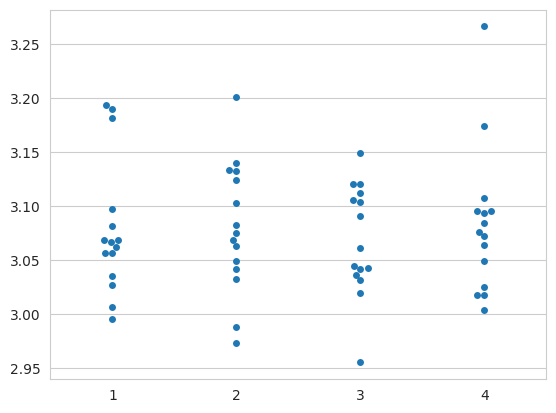

In [51]:
outs = np.array(outs)
a, b = outs.shape
ds = np.tile(np.arange(a), (b, 1)).T + 1
sns.swarmplot(x=ds.flatten(), y = outs.flatten())

In [57]:
print(np.median(outs.reshape(a,b), axis=1))
print(np.mean(outs.reshape(a,b), axis=1))

[3.06707071 3.07525151 3.06098546 3.07608696]
[3.07928033 3.08056442 3.06911381 3.082741  ]
